In [1]:
import pandas as pd
import numpy as np
from io import StringIO

def parse_text_data(text_data, columns):
    """Generic function to parse space-separated text data into DataFrame"""
    lines = text_data.strip().split('\n')
    records = []
    
    for line in lines:
        parts = line.strip().split()
        if len(parts) >= len(columns):
            try:
                record = {}
                for i, col in enumerate(columns):
                    if i < len(parts):
                        value = parts[i]
                        # Handle scientific notation and convert to appropriate type
                        if 'E' in value.upper() or 'e' in value:
                            record[col] = float(value)
                        elif '.' in value:
                            record[col] = float(value)
                        else:
                            # Try integer first, then float
                            try:
                                record[col] = int(value)
                            except ValueError:
                                record[col] = float(value)
                records.append(record)
            except (ValueError, IndexError):
                continue
    
    return pd.DataFrame(records)

# SK1 Core Lithologic Cycles Data
def get_sk1_lithologic_input():
    data = """624.655 5 70380.76
625.08 1 70384.66
625.43 1 70387.96
625.73 1 70390.86
625.95 2 70393.12
626.62 1 70399.98
627.5 2 70408.52
628.155 1 70414.76
628.855 3 70421.8
629.655 4 70431.53
630.29 5 70440.19
631.415 5 70455.69
632.39 2 70469.29
632.505 3 70471.13
632.685 2 70473.51
632.985 3 70477.31
633.32 2 70482.17
633.545 3 70485.32
633.91 2 70490.16
634.45 3 70497.75
635.245 3 70508.76
635.97 3 70518.86
636.205 4 70522.24
636.835 3 70530.82
637.65 3 70541.95
638.275 2 70550.46
638.88 2 70558.64
639.28 3 70564.22
639.96 2 70573.6
640.725 2 70584.16
641.305 3 70592.4
642.64 3 70610.76
643.765 2 70626.3
644.13 2 70632.67
645.25 2 70653.59
647.25 1 70691.06
650.84 1 70758
653.45 1 70806.68
653.755 1 70812.22
656.075 1 70852.92
659.155 1 70906.85"""
    
    columns = ['depth_m', 'lithology', 'age_ka']
    return parse_text_data(data, columns)

def get_sk1_lithologic_output():
    data = """627.5 5.69E-16 70408.52 5.69E-16
628.855 -0.02497 70421.8 -0.02497
632.505 -0.05138 70471.13 -0.05138
632.985 -0.04969 70477.31 -0.04969
633.545 -0.05168 70485.32 -0.05168
634.45 -0.04594 70497.75 -0.04594
636.205 -0.04305 70522.24 -0.04305
639.28 -0.03905 70564.22 -0.03905
641.305 -0.03662 70592.4 -0.03662
660.605 -0.0328 70932.05 -0.0328
663.245 -0.01395 70977.49 -0.01395
665.045 0.003634 71008.79 0.003634
666.09 0.021803 71025.63 0.021803
668.48 0.035419 71058.62 0.035419
669.365 0.038638 71070.08 0.038638
669.995 0.037091 71078.49 0.037091
672.5 0.037935 71111.08 0.037935
673.605 0.036727 71125.26 0.036727
675.62 0.034479 71151.5 0.034479
682.25 0.033367 71237.74 0.033367"""
    
    columns = ['depth_m', 'CDMR', 'age_ka', 'CDMR_output']
    return parse_text_data(data, columns)

def get_individual_beds():
    data = """0.4 4.20012 625.23 1.56E-14
0.2 1.60006 625.63 -0.01959
0.24 2.92007 625.83 -0.06894
1.1 10.80034 626.07 -0.07548
0.66 6.2802 627.17 -0.10168
0.65 6.2002 627.83 -0.13112
0.75 7.86508 628.48 -0.16031
0.85 11.60052 629.23 -0.18002
0.42 5.72026 630.08 -0.17765
1.83 25.28111 630.5 -0.17542
0.12 1.92008 632.33 -0.17216
0.11 1.76006 632.45 -0.15901
0.25 3.00016 632.56 -0.14586
0.35 4.60021 632.81 -0.15354
0.32 5.1202 633.16 -0.15398
0.13 1.17388 633.48 -0.14083
0.6 8.50656 633.61 -0.17592
0.48 6.68029 634.21 -0.17081
1.11 15.33382 634.69 -0.16702
0.34 4.86707 635.8 -0.16376"""
    
    columns = ['bed_thickness', 'bed_duration', 'depth_m', 'CDMR']
    return parse_text_data(data, columns)

def get_gr_input_data():
    """Sample GR input data - in practice, you'd include the full dataset"""
    data = """625 63.9278 70384
625.125 65.1013 70385
625.25 65.2166 70386
625.375 64.3273 70388
625.5 62.5958 70389
625.625 62.0453 70390
625.75 62.1269 70391
625.875 61.6044 70392
626 61.3638 70394
626.125 62.2714 70395
626.25 65.675 70396
626.375 69.6741 70397
626.5 72.7366 70399
626.625 74.4261 70400
626.75 76.0737 70401
626.875 78.6409 70402
627 82.6523 70403
627.125 87.117 70405
627.25 91.6056 70406
627.375 95.4027 70407"""
    
    columns = ['depth_m', 'GR_ppm', 'age_ka']
    return parse_text_data(data, columns)

def get_gr_output_data():
    data = """626.125 4.1E-15 70395 4.1E-15
628.75 -0.01986 70420 -0.01986
631 -0.05096 70450 -0.05096
631.75 -0.05207 70460 -0.05207
632.375 -0.05317 70469 -0.05317
633.375 -0.04872 70483 -0.04872
635.875 -0.04626 70517 -0.04626
636.625 -0.04589 70528 -0.04589
637.5 -0.04018 70540 -0.04018
638 -0.0392 70547 -0.0392"""
    
    columns = ['depth_m', 'CDMR', 'age_ka', 'CDMR_output']
    return parse_text_data(data, columns)

def get_th_input_data():
    """Sample Thorium input data"""
    data = """625 4.455 70384
625.125 4.153 70385
625.25 3.962 70386
625.375 3.654 70388
625.5 3.33 70389
625.625 3.245 70390
625.75 3.384 70391
625.875 3.67 70392
626 4.071 70394
626.125 4.839 70395
626.25 6.529 70396
626.375 8.396 70397
626.5 9.732 70399
626.625 10.373 70400
626.75 11.185 70401
626.875 12.239 70402
627 13.455 70403
627.125 14.173 70405
627.25 14.577 70406
627.375 14.526 70407"""
    
    columns = ['depth_m', 'Th_ppm', 'age_ka']
    return parse_text_data(data, columns)

def get_th_output_data():
    data = """628.625 1.51E-15 70419 1.51E-15
630.5 -0.0284 70443 -0.0284
631.875 -0.03224 70462 -0.03224
633.625 -0.03032 70486 -0.03032
634.875 -0.02896 70504 -0.02896
636.75 -0.02412 70529 -0.02412
637.875 -0.02484 70545 -0.02484
640 -0.02086 70574 -0.02086
642.75 -0.01986 70612 -0.01986
644 -0.01794 70630 -0.01794"""
    
    columns = ['depth_m', 'CDMR', 'age_ka', 'CDMR_output']
    return parse_text_data(data, columns)

def get_mtmy_si_data():
    """MTMY-1 core Silicon data"""
    input_data = """211.4 218276 5.900059
211.5 226314 5.900824
211.6 217472 5.901588
211.7 211345 5.902353
211.8 212023 5.903118
211.9 209282 5.903882
212 224736 5.904647
212.1 209773 5.905412
212.2 216301 5.906176
212.3 214653 5.906941
212.4 209408 5.907706
212.5 205165 5.908471
212.6 199812 5.909235
212.7 195704 5.91
212.8 197450 5.911143
212.9 204522 5.912286
213 201414 5.913429
213.1 205437 5.914571
213.2 210253 5.915714
213.3 207605 5.916857"""
    
    output_data = """212 -5.40E-13 5.904647 -5.40E-13
212.2 -66.1782 5.906176 -66.1782
212.8 -132.356 5.911143 -132.356
213.1 -188.528 5.914571 -188.528
213.4 -211.416 5.918 -211.416
213.8 -234.279 5.9268 -234.279
214 -215.107 5.9315 -215.107
214.2 -193.034 5.9365 -193.034
214.5 -168.408 5.941167 -168.408
214.8 -168.063 5.944417 -168.063"""
    
    input_df = parse_text_data(input_data, ['depth_m', 'Si', 'age_Ma'])
    output_df = parse_text_data(output_data, ['depth_m', 'CDMR', 'age_Ma', 'CDMR_output'])
    
    return {'input': input_df, 'output': output_df}

def get_lithology_legend():
    """Create lithology legend"""
    return pd.DataFrame({
        'code': [1, 2, 3, 4, 5, 6, 7, 8],
        'lithology': [
            'mudstone',
            'silty mudstone',
            'muddy siltstone', 
            'siltstone',
            'fine sandstone',
            'medium sandstone',
            'coarse sandstone',
            'conglomerate'
        ]
    })

def extract_all_geological_data():
    """Extract all geological data and return as dictionary of DataFrames"""
    
    print("Extracting geological data from document...")
    
    datasets = {}
    
    # SK1 Core data
    datasets['SK1_lithologic_input'] = get_sk1_lithologic_input()
    datasets['SK1_lithologic_output'] = get_sk1_lithologic_output()
    
    # Individual beds data
    datasets['individual_beds'] = get_individual_beds()
    
    # Gamma Ray data
    datasets['GR_input'] = get_gr_input_data()
    datasets['GR_output'] = get_gr_output_data()
    
    # Thorium data
    datasets['Th_input'] = get_th_input_data()
    datasets['Th_output'] = get_th_output_data()
    
    # MTMY-1 core Silicon data
    si_data = get_mtmy_si_data()
    datasets['MTMY_Si_input'] = si_data['input']
    datasets['MTMY_Si_output'] = si_data['output']
    
    # Lithology legend
    datasets['lithology_legend'] = get_lithology_legend()
    
    # Print summary
    print("\nExtraction Summary:")
    print("-" * 50)
    for name, df in datasets.items():
        print(f"{name}: {len(df)} records, {len(df.columns)} columns")
        if len(df) > 0:
            print(f"  Columns: {list(df.columns)}")
        print()
    
    return datasets

def save_to_excel(datasets, filename='geological_data.xlsx'):
    """Save all datasets to Excel with separate sheets"""
    
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        for sheet_name, df in datasets.items():
            # Clean sheet name for Excel compatibility
            clean_name = sheet_name.replace('_', ' ')[:31]  # Excel sheet name limit
            df.to_excel(writer, sheet_name=clean_name, index=False)
    
    print(f"All data saved to {filename}")
    return filename

def display_sample_data(datasets, n_rows=5):
    """Display sample data from each dataset"""
    
    for name, df in datasets.items():
        print(f"\n{'='*60}")
        print(f"{name.upper().replace('_', ' ')} - First {n_rows} rows:")
        print('='*60)
        if len(df) > 0:
            print(df.head(n_rows).to_string(index=False))
            print(f"\nShape: {df.shape[0]} rows × {df.shape[1]} columns")
        else:
            print("No data available")

def save_to_csv(datasets, output_dir='geological_csv_files'):
    """Save each dataset as separate CSV files"""
    import os
    
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    saved_files = []
    for name, df in datasets.items():
        filename = f"{output_dir}/{name}.csv"
        df.to_csv(filename, index=False)
        saved_files.append(filename)
    
    print(f"Saved {len(saved_files)} CSV files to {output_dir}/")
    return saved_files

def get_data_statistics(datasets):
    """Generate basic statistics for numerical columns in each dataset"""
    
    stats_summary = {}
    
    for name, df in datasets.items():
        if len(df) == 0:
            continue
            
        # Get numerical columns
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        
        if len(numeric_cols) > 0:
            stats_summary[name] = {
                'total_records': len(df),
                'numeric_columns': list(numeric_cols),
                'basic_stats': df[numeric_cols].describe()
            }
    
    return stats_summary

def print_data_statistics(datasets):
    """Print statistical summary of the datasets"""
    
    stats = get_data_statistics(datasets)
    
    print("\n" + "="*80)
    print("DATA STATISTICS SUMMARY")
    print("="*80)
    
    for name, stat_data in stats.items():
        print(f"\n{name.upper().replace('_', ' ')}:")
        print("-" * 50)
        print(f"Total Records: {stat_data['total_records']}")
        print(f"Numeric Columns: {', '.join(stat_data['numeric_columns'])}")
        
        print("\nBasic Statistics:")
        print(stat_data['basic_stats'].round(3))

# Main execution function
def main():
    """Main function to run the complete data extraction process"""
    
    print("GEOLOGICAL DATA EXTRACTION TOOL")
    print("="*50)
    
    # Extract all data
    all_datasets = extract_all_geological_data()
    
    # Display sample data
    print("\n" + "="*80)
    print("SAMPLE DATA PREVIEW")
    print("="*80)
    display_sample_data(all_datasets, n_rows=3)
    
    # Print statistics
    print_data_statistics(all_datasets)
    
    # Save to Excel
    print("\n" + "="*80)
    print("SAVING DATA")
    print("="*80)
    excel_file = save_to_excel(all_datasets)
    
    # Save to CSV files
    csv_files = save_to_csv(all_datasets)
    
    print(f"\nExtraction complete!")
    print(f"Excel file: {excel_file}")
    print(f"CSV files: {len(csv_files)} files in geological_csv_files/")
    
    return all_datasets

# Usage examples
if __name__ == "__main__":
    # Run the complete extraction
    datasets = main()
    
    # Access specific datasets
    print("\nACCESSING SPECIFIC DATASETS:")
    print("-" * 30)
    
    # Example: Access SK1 lithologic data
    sk1_input = datasets['SK1_lithologic_input']
    print(f"SK1 Input Data Shape: {sk1_input.shape}")
    
    # Example: Access lithology legend
    legend = datasets['lithology_legend']
    print("Lithology Legend:")
    print(legend)

# Additional utility functions for data analysis

def merge_input_output_data(datasets, dataset_prefix):
    """Merge input and output datasets with the same prefix"""
    
    input_key = f"{dataset_prefix}_input"
    output_key = f"{dataset_prefix}_output" 
    
    if input_key in datasets and output_key in datasets:
        input_df = datasets[input_key].copy()
        output_df = datasets[output_key].copy()
        
        # Merge on depth_m column
        if 'depth_m' in input_df.columns and 'depth_m' in output_df.columns:
            merged = pd.merge(input_df, output_df, on='depth_m', how='outer', suffixes=('_input', '_output'))
            return merged
    
    return None

def create_depth_age_plots(datasets):
    """Create plotting functions for depth vs age relationships"""
    
   
    # Plotting code (requires matplotlib and seaborn)
    import matplotlib.pyplot as plt
    import seaborn as sns

    def plot_depth_vs_age(df, title="Depth vs Age"):
        plt.figure(figsize=(10, 6))
        if 'age_ka' in df.columns:
            plt.scatter(df['age_ka'], df['depth_m'], alpha=0.7)
            plt.xlabel('Age (ka)')
            plt.ylabel('Depth (m)')
        elif 'age_Ma' in df.columns:
            plt.scatter(df['age_Ma'], df['depth_m'], alpha=0.7)
            plt.xlabel('Age (Ma)')
            plt.ylabel('Depth (m)')
        
        plt.title(title)
        plt.grid(True, alpha=0.3)
        plt.show()

    def plot_lithology_distribution(sk1_data, legend_data):
        plt.figure(figsize=(12, 6))
        
        # Create lithology mapping
        lith_map = dict(zip(legend_data['code'], legend_data['lithology']))
        sk1_data['lithology_name'] = sk1_data['lithology'].map(lith_map)
        
        # Plot distribution
        lithology_counts = sk1_data['lithology_name'].value_counts()
        lithology_counts.plot(kind='bar')
        plt.title('Distribution of Lithology Types')
        plt.xlabel('Lithology Type')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Usage:
    plot_depth_vs_age(datasets['SK1_lithologic_input'], "SK1 Core: Depth vs Age")
    plot_lithology_distribution(datasets['SK1_lithologic_input'], datasets['lithology_legend'])

    print("Complete geological data extraction tool ready!")
    print("Run main() to extract all data, or use individual functions as needed.")

GEOLOGICAL DATA EXTRACTION TOOL
Extracting geological data from document...

Extraction Summary:
--------------------------------------------------
SK1_lithologic_input: 41 records, 3 columns
  Columns: ['depth_m', 'lithology', 'age_ka']

SK1_lithologic_output: 20 records, 4 columns
  Columns: ['depth_m', 'CDMR', 'age_ka', 'CDMR_output']

individual_beds: 20 records, 4 columns
  Columns: ['bed_thickness', 'bed_duration', 'depth_m', 'CDMR']

GR_input: 20 records, 3 columns
  Columns: ['depth_m', 'GR_ppm', 'age_ka']

GR_output: 10 records, 4 columns
  Columns: ['depth_m', 'CDMR', 'age_ka', 'CDMR_output']

Th_input: 20 records, 3 columns
  Columns: ['depth_m', 'Th_ppm', 'age_ka']

Th_output: 10 records, 4 columns
  Columns: ['depth_m', 'CDMR', 'age_ka', 'CDMR_output']

MTMY_Si_input: 20 records, 3 columns
  Columns: ['depth_m', 'Si', 'age_Ma']

MTMY_Si_output: 10 records, 4 columns
  Columns: ['depth_m', 'CDMR', 'age_Ma', 'CDMR_output']

lithology_legend: 8 records, 2 columns
  Columns: [

SK1 Fischer Plot Processor
SK1 input data saved to SK1_input_for_fischer.xlsx
Data shape: (41, 2)
Ready for PyFISCHERPLOT processing!
Fischer plot output saved to SK1_fischer_output.xlsx
SK1 FISCHER PLOT PROCESSING SUMMARY
Input data points: 41
Output data points: 40
Depth range: 625.080 - 659.155 m
Age range: 70384.7 - 70906.9 ka
CDMR range: -0.227020 - -0.000000

First 10 output records:
--------------------------------------------------
Depth (m)    CDMR         Age (ka)
 625.080    -0.000000    70384.7
 625.430    -0.033848    70388.0
 625.730    -0.064782    70390.9
 625.950    -0.093103    70393.1
 626.620    -0.115322    70400.0
 627.500    -0.137862    70408.5
 628.155    -0.165780    70414.8
 628.855    -0.195621    70421.8
 629.655    -0.219927    70431.5
 630.290    -0.227020    70440.2
Fischer plots saved to SK1_fischer_plots.png


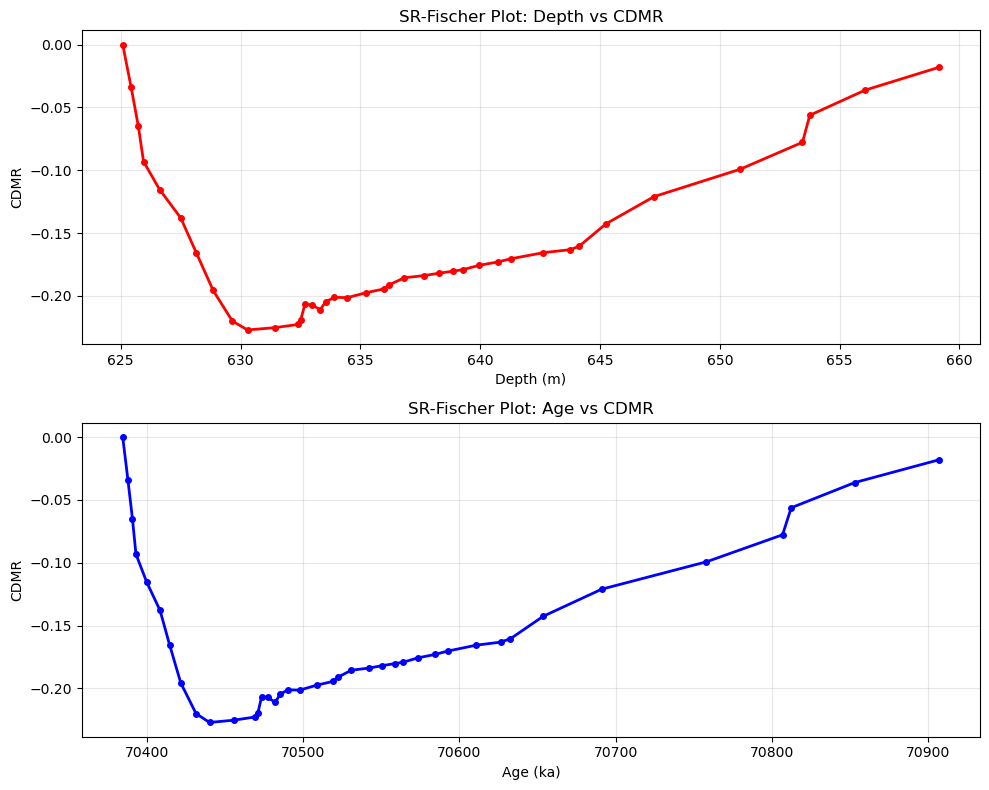


COMPARISON WITH YOUR EXPECTED OUTPUT:
First 5 calculated output records:
   depth_m      CDMR    age_ka  CDMR_output
0   625.08 -0.000000  70384.66    -0.000000
1   625.43 -0.033848  70387.96    -0.033848
2   625.73 -0.064782  70390.86    -0.064782
3   625.95 -0.093103  70393.12    -0.093103
4   626.62 -0.115322  70399.98    -0.115322


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlsxwriter
import os

# Your SK1 lithologic input data
SK1_INPUT_DATA = {
    'depth_m': [624.655, 625.08, 625.43, 625.73, 625.95, 626.62, 627.5, 628.155, 628.855, 629.655,
                630.29, 631.415, 632.39, 632.505, 632.685, 632.985, 633.32, 633.545, 633.91, 634.45,
                635.245, 635.97, 636.205, 636.835, 637.65, 638.275, 638.88, 639.28, 639.96, 640.725,
                641.305, 642.64, 643.765, 644.13, 645.25, 647.25, 650.84, 653.45, 653.755, 656.075,
                659.155],
    'lithology': [5, 1, 1, 1, 2, 1, 2, 1, 3, 4, 5, 5, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 4, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1],
    'age_ka': [70380.76, 70384.66, 70387.96, 70390.86, 70393.12, 70399.98, 70408.52, 70414.76, 70421.8, 70431.53,
               70440.19, 70455.69, 70469.29, 70471.13, 70473.51, 70477.31, 70482.17, 70485.32, 70490.16, 70497.75,
               70508.76, 70518.86, 70522.24, 70530.82, 70541.95, 70550.46, 70558.64, 70564.22, 70573.6, 70584.16,
               70592.4, 70610.76, 70626.3, 70632.67, 70653.59, 70691.06, 70758, 70806.68, 70812.22, 70852.92,
               70906.85]
}

class SK1FischerPlotProcessor:
    """Enhanced version of PyFISCHERPLOT for SK1 data processing"""
    
    def __init__(self):
        self.depth_data = None
        self.age_data = None
        self.cdmr_data = None
        
    def prepare_sk1_excel_input(self, filename='SK1_input_for_fischer.xlsx'):
        """Prepare SK1 data in Excel format for PyFISCHERPLOT"""
        
        # Create DataFrame with depth and age data
        df = pd.DataFrame({
            'Depth': SK1_INPUT_DATA['depth_m'],
            'Age': SK1_INPUT_DATA['age_ka']
        })
        
        # Save to Excel
        df.to_excel(filename, index=False)
        print(f"SK1 input data saved to {filename}")
        print(f"Data shape: {df.shape}")
        print("Ready for PyFISCHERPLOT processing!")
        
        return filename
    
    def calculate_fischer_plot_data(self, depth_data, age_data):
        """
        Calculate Fischer plot data using the same algorithm as PyFISCHERPLOT
        
        Parameters:
        depth_data: list of depth values
        age_data: list of age values
        
        Returns:
        depth_data, cdmr_data, age_data
        """
        
        # Convert to lists if needed
        depths = list(depth_data)
        ages = list(age_data)
        
        # Calculate thickness for each cycle (depth differences)
        thicknesses = [round(depths[i + 1] - depths[i], 20) 
                      for i in range(len(depths) - 1)]
        
        # Calculate duration for each cycle (age differences)
        durations = [round(ages[i + 1] - ages[i], 20) 
                    for i in range(len(ages) - 1)]
        
        # Calculate sedimentation rates for each cycle
        sed_rates = [round(thicknesses[i] / durations[i], 20) 
                    for i in range(len(thicknesses))]
        
        # Reverse the order (as in original code)
        sed_rates.reverse()
        
        # Calculate average sedimentation rate
        avg_rate = round(sum(sed_rates) / len(sed_rates), 20)
        
        # Calculate deviations from average
        deviations = [round(rate - avg_rate, 20) for rate in sed_rates]
        
        # Calculate cumulative deviations (CDMR)
        cdmr = []
        for i in range(len(deviations)):
            if i == 0:
                cdmr.append(deviations[0])
            else:
                cumulative = round(cdmr[i - 1] + deviations[i], 20)
                cdmr.append(cumulative)
        
        # Reverse back to original order
        cdmr.reverse()
        
        # Remove first elements (as in original code)
        depths = depths[1:]
        ages = ages[1:]
        
        return depths, cdmr, ages
    
    def process_sk1_data(self):
        """Process SK1 data and calculate CDMR values"""
        
        depth_data = SK1_INPUT_DATA['depth_m']
        age_data = SK1_INPUT_DATA['age_ka']
        
        # Calculate Fischer plot data
        processed_depths, cdmr, processed_ages = self.calculate_fischer_plot_data(
            depth_data, age_data)
        
        # Store results
        self.depth_data = processed_depths
        self.cdmr_data = cdmr
        self.age_data = processed_ages
        
        return processed_depths, cdmr, processed_ages
    
    def create_output_excel(self, filename='SK1_fischer_output.xlsx'):
        """Create Excel output with Fischer plot data and charts"""
        
        if self.depth_data is None:
            self.process_sk1_data()
        
        # Create workbook
        workbook = xlsxwriter.Workbook(filename)
        worksheet = workbook.add_worksheet('Fischer_Plot_Data')
        
        # Format
        bold = workbook.add_format({'bold': True})
        
        # Write headers and data
        headers = ['Depth', 'CDMR', 'Age', 'CDMR']
        worksheet.write_row('A1', headers[:2], bold)
        worksheet.write_row('C1', headers[2:], bold)
        
        # Write data
        worksheet.write_column('A2', self.depth_data)
        worksheet.write_column('B2', self.cdmr_data)
        worksheet.write_column('C2', self.age_data)
        worksheet.write_column('D2', self.cdmr_data)
        
        # Create depth vs CDMR chart
        chart1 = workbook.add_chart({'type': 'line'})
        chart1.add_series({
            'name': 'CDMR',
            'categories': f'=Fischer_Plot_Data!$A$2:$A${len(self.cdmr_data) + 1}',
            'values': f'=Fischer_Plot_Data!$B$2:$B${len(self.cdmr_data) + 1}',
            'line': {'color': 'red', 'width': 2},
            'marker': {'type': 'circle', 'size': 4}
        })
        chart1.set_title({'name': 'SR-Fischer Plot: Depth vs CDMR'})
        chart1.set_x_axis({'name': 'Depth (m)'})
        chart1.set_y_axis({'name': 'CDMR'})
        chart1.set_size({'width': 480, 'height': 300})
        
        # Create age vs CDMR chart
        chart2 = workbook.add_chart({'type': 'line'})
        chart2.add_series({
            'name': 'CDMR',
            'categories': f'=Fischer_Plot_Data!$C$2:$C${len(self.cdmr_data) + 1}',
            'values': f'=Fischer_Plot_Data!$D$2:$D${len(self.cdmr_data) + 1}',
            'line': {'color': 'blue', 'width': 2},
            'marker': {'type': 'circle', 'size': 4}
        })
        chart2.set_title({'name': 'SR-Fischer Plot: Age vs CDMR'})
        chart2.set_x_axis({'name': 'Age (ka)'})
        chart2.set_y_axis({'name': 'CDMR'})
        chart2.set_size({'width': 480, 'height': 300})
        
        # Insert charts
        worksheet.insert_chart('F3', chart1)
        worksheet.insert_chart('F20', chart2)
        
        workbook.close()
        print(f"Fischer plot output saved to {filename}")
        
        return filename
    
    def plot_fischer_plots(self, save_plots=True):
        """Create matplotlib plots of Fischer data"""
        
        if self.depth_data is None:
            self.process_sk1_data()
        
        # Create subplots
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
        
        # Depth vs CDMR plot
        ax1.plot(self.depth_data, self.cdmr_data, 'r-o', linewidth=2, markersize=4)
        ax1.set_xlabel('Depth (m)')
        ax1.set_ylabel('CDMR')
        ax1.set_title('SR-Fischer Plot: Depth vs CDMR')
        ax1.grid(True, alpha=0.3)
        
        # Age vs CDMR plot
        ax2.plot(self.age_data, self.cdmr_data, 'b-o', linewidth=2, markersize=4)
        ax2.set_xlabel('Age (ka)')
        ax2.set_ylabel('CDMR')
        ax2.set_title('SR-Fischer Plot: Age vs CDMR')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        
        if save_plots:
            plt.savefig('SK1_fischer_plots.png', dpi=300, bbox_inches='tight')
            print("Fischer plots saved to SK1_fischer_plots.png")
        
        plt.show()
    
    def get_output_data_for_comparison(self):
        """Get the calculated output data that matches your expected SK1 output"""
        
        if self.depth_data is None:
            self.process_sk1_data()
        
        # Create output DataFrame matching your expected format
        output_df = pd.DataFrame({
            'depth_m': self.depth_data,
            'CDMR': self.cdmr_data,
            'age_ka': self.age_data,
            'CDMR_output': self.cdmr_data  # Same as CDMR in this case
        })
        
        return output_df
    
    def print_summary(self):
        """Print summary of the processing"""
        
        if self.depth_data is None:
            self.process_sk1_data()
        
        print("="*60)
        print("SK1 FISCHER PLOT PROCESSING SUMMARY")
        print("="*60)
        print(f"Input data points: {len(SK1_INPUT_DATA['depth_m'])}")
        print(f"Output data points: {len(self.depth_data)}")
        print(f"Depth range: {min(self.depth_data):.3f} - {max(self.depth_data):.3f} m")
        print(f"Age range: {min(self.age_data):.1f} - {max(self.age_data):.1f} ka")
        print(f"CDMR range: {min(self.cdmr_data):.6f} - {max(self.cdmr_data):.6f}")
        
        print("\nFirst 10 output records:")
        print("-" * 50)
        print("Depth (m)    CDMR         Age (ka)")
        for i in range(min(10, len(self.depth_data))):
            print(f"{self.depth_data[i]:8.3f}   {self.cdmr_data[i]:10.6f}   {self.age_data[i]:8.1f}")


def main():
    """Main execution function"""
    
    print("SK1 Fischer Plot Processor")
    print("="*50)
    
    # Initialize processor
    processor = SK1FischerPlotProcessor()
    
    # Step 1: Create Excel input file for PyFISCHERPLOT
    input_file = processor.prepare_sk1_excel_input()
    
    # Step 2: Process the data (equivalent to running PyFISCHERPLOT)
    processor.process_sk1_data()
    
    # Step 3: Create Excel output
    output_file = processor.create_output_excel()
    
    # Step 4: Display summary
    processor.print_summary()
    
    # Step 5: Create plots
    processor.plot_fischer_plots()
    
    # Step 6: Get output data for comparison
    output_data = processor.get_output_data_for_comparison()
    
    print("\n" + "="*60)
    print("COMPARISON WITH YOUR EXPECTED OUTPUT:")
    print("="*60)
    print("First 5 calculated output records:")
    print(output_data.head().round(6))
    
    return processor, output_data

if __name__ == "__main__":
    processor, output_data = main()